In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('tracks_cleaned_2.csv')

In [4]:
df.head()

,artist_id,artist_name,track_name,track_id,popularity,explicit,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,time_signature,mode,release_year,duration
0,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,L.I.F.E,0eyJ7wobiSnBiviFjDD4WV,13,False,0.618,0.557,0.0,-5.227,0.0747,0.482000,0.294,0.332,144.046,4.0,1.0,2021,2.703233
1,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,G-spot,0n5HmWeoStEZzxdu4DFiBv,10,False,0.711,0.444,7.0,-7.602,0.2800,0.543000,0.118,0.630,80.210,4.0,0.0,2021,3.622750
2,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,High grade,19BuQIrARlDVkOgY06BuP2,10,False,0.516,0.684,1.0,-5.736,0.0467,0.139000,0.113,0.135,99.932,4.0,0.0,2021,3.716350
3,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,Story,4Fvl6HcI4kfiACcelfWhkw,10,False,0.491,0.467,0.0,-9.551,0.0545,0.154000,0.146,0.574,131.662,5.0,0.0,2021,3.245300
4,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,Bubble,4VJMkS6IEdG7pN8UpJugvT,12,False,0.590,0.592,5.0,-7.909,0.2340,0.000575,0.405,0.293,70.254,3.0,0.0,2021,3.257150


## Data Prep

##### Drop all uneccessary columns

In [5]:
df.dtypes

artist_id          object
artist_name        object
track_name         object
track_id           object
popularity          int64
explicit             bool
danceability      float64
energy            float64
key               float64
loudness          float64
speechiness       float64
acousticness      float64
liveness          float64
valence           float64
tempo             float64
time_signature    float64
mode              float64
release_year        int64
duration          float64
dtype: object

In [6]:
df2 = df.drop(['artist_id',
         'artist_name', 
         'track_name', 
         'track_id', 
         'popularity',
         'time_signature'
        ],
        axis=1,
       )

In [7]:
# Edit categotical values to reflect what they represent.

df2['key'] = df['key'].replace([0],'C')
df2['key'] = df['key'].replace([1],'C#/Db')
df2['key'] = df['key'].replace([2],'D')
df2['key'] = df['key'].replace([3],'D#/Eb')
df2['key'] = df['key'].replace([4],'E')
df2['key'] = df['key'].replace([5],'F')
df2['key'] = df['key'].replace([6],'F#/Gb')
df2['key'] = df['key'].replace([7],'G')
df2['key'] = df['key'].replace([8],'G#/Ab')
df2['key'] = df['key'].replace([9],'A')
df2['key'] = df['key'].replace([10],'A#/Bb')
df2['key'] = df['key'].replace([11],'B')

df2['mode'] = df['mode'].replace([1],'Major')
df2['mode'] = df['mode'].replace([0],'Minor')

df2['explicit'] = df['explicit'].replace([True],'explict')
df2['explicit'] = df['explicit'].replace([False],'clean')

##### One Hot Encoding

In [8]:
# One Hot Encoder Function
def one_hot_encode(multcolumns, final_df):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [9]:
columns = ['key', 'mode', 'explicit']

In [10]:
df2 = one_hot_encode(columns, df2)

key
mode
explicit


In [11]:
df2.head()

,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,release_year,duration,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,B,Minor,clean
0,0.618,0.557,-5.227,0.0747,0.482000,0.294,0.332,144.046,2021,2.703233,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.711,0.444,-7.602,0.2800,0.543000,0.118,0.630,80.210,2021,3.622750,0,0,0,0,0,0,1,0,0,0,0,1,1
2,0.516,0.684,-5.736,0.0467,0.139000,0.113,0.135,99.932,2021,3.716350,1,0,0,0,0,0,0,0,0,0,0,1,1
3,0.491,0.467,-9.551,0.0545,0.154000,0.146,0.574,131.662,2021,3.245300,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0.590,0.592,-7.909,0.2340,0.000575,0.405,0.293,70.254,2021,3.257150,0,0,0,0,1,0,0,0,0,0,0,1,1


## Unsupervised Clustering Using K-Means

##### Standardize Data

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [13]:
# Standardize dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(df2)
X_train = pd.DataFrame(X_train, columns=[df2.columns])

C:\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [14]:
X_train.head()

,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,release_year,duration,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,B,Minor,clean
0,-0.847434,-0.278386,0.866977,-0.665478,1.339412,0.644171,-1.873501,0.827075,0.925418,-0.572233,-0.350821,-0.28986,-0.144345,-0.262012,-0.279548,-0.293346,-0.398671,-0.2718,-0.322636,-0.292029,-0.311743,-0.828910,0.271856
1,-0.073181,-0.943692,0.238272,0.961875,1.622347,-0.420749,-0.331914,-1.145066,0.925418,-0.087121,-0.350821,-0.28986,-0.144345,-0.262012,-0.279548,-0.293346,2.508334,-0.2718,-0.322636,-0.292029,-0.311743,1.206404,0.271856
2,-1.696616,0.469347,0.732235,-0.887425,-0.251521,-0.451003,-2.892604,-0.535777,0.925418,-0.037740,2.850460,-0.28986,-0.144345,-0.262012,-0.279548,-0.293346,-0.398671,-0.2718,-0.322636,-0.292029,-0.311743,1.206404,0.271856
3,-1.904749,-0.808275,-0.277663,-0.825597,-0.181946,-0.251330,-0.621608,0.444485,0.925418,-0.286253,-0.350821,-0.28986,-0.144345,-0.262012,-0.279548,-0.293346,-0.398671,-0.2718,-0.322636,-0.292029,-0.311743,1.206404,0.271856
4,-1.080543,-0.072318,0.157004,0.597246,-0.893575,1.315796,-2.075252,-1.452645,0.925418,-0.280002,-0.350821,-0.28986,-0.144345,-0.262012,3.577204,-0.293346,-0.398671,-0.2718,-0.322636,-0.292029,-0.311743,1.206404,0.271856


##### KMeans inital run

In [15]:
# Determine the best number of clusters for KMeans
def k_optimizer(data, max_k):
    """
    Expects: Dataframe to apply KMeans, and the maximum value for k
    Return: returns a plot for the ks to manually determine the ideal k
    """
    
    means=[]
    inertia=[]
    
    # Model data with each k
    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, random_state=876)
        kmeans.fit(data)
        
        means.append(k)
        inertia.append(kmeans.inertia_)
        print(f'The innertia for {k} Clusters is: {kmeans.inertia_}')
    # Generate plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertia, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.xticks(means)
    plt.grid(True)
    plt.show()

The innertia for 2 Clusters is: 827820.0740799205
The innertia for 3 Clusters is: 788960.4941632359
The innertia for 4 Clusters is: 750807.2469716904
The innertia for 5 Clusters is: 709466.3232796881
The innertia for 6 Clusters is: 668516.9688681427
The innertia for 7 Clusters is: 627578.4852317641
The innertia for 8 Clusters is: 588149.4924452078
The innertia for 9 Clusters is: 547682.2248174947
The innertia for 10 Clusters is: 508923.6448500272
The innertia for 11 Clusters is: 470091.995435294
The innertia for 12 Clusters is: 450303.82046401594
The innertia for 13 Clusters is: 426980.537075044
The innertia for 14 Clusters is: 411264.5045152854
The innertia for 15 Clusters is: 402370.325526988
The innertia for 16 Clusters is: 398867.7027403204
The innertia for 17 Clusters is: 393133.5058787238
The innertia for 18 Clusters is: 386787.82734363026
The innertia for 19 Clusters is: 384484.4201709656
The innertia for 20 Clusters is: 379703.1206586597
The innertia for 21 Clusters is: 377187.

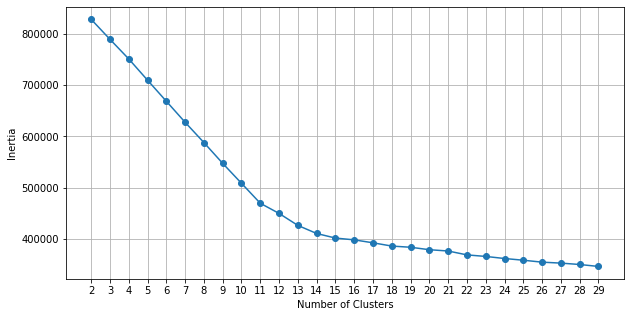

In [16]:
k_optimizer(X_train, 30)

Model using the ideal k from graph

In [17]:
kmeans = KMeans(n_clusters=11, random_state=876)
kmeans.fit(X_train)

KMeans(n_clusters=11, random_state=876)

In [18]:
# Get the number of values within each cluster
def cluster_count(cluster_list):
    unique, counts = np.unique(cluster_list, return_counts=True)
    clusters_len = len(counts)
    counts = counts.reshape(1, clusters_len)

    columns = []
    for i in range(clusters_len):
        columns.append(f'cluster {i}')
    
    cluster_counts = pd.DataFrame(counts, columns=columns)
    return(cluster_counts)

In [19]:
cluster_count(kmeans.labels_)

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,cluster 10
0,2455,4188,2962,3028,3003,2770,3385,2629,9413,3603,780


In [20]:
(cluster_count(kmeans.labels_).sum()).sum()

38216

##### Run initial PCA to plot clusters

In [21]:
# Optain principal components
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [22]:
# Run pca and plot data with two n_components
def init_pca(X_train, cluster_list, n_components):
    X = X_train
    y = cluster_list
    target_names = list(cluster_count(cluster_list).columns)

    pca = PCA(n_components=n_components, random_state=876)
    X_r = pca.fit(X).transform(X)

    print(f'Explained variance ratio:{pca.explained_variance_ratio_}')
    print(f'These components accounts for {round(np.sum(pca.explained_variance_ratio_)*100, 2)}% of the variance')
    
    if n_components == 2:
        plt.figure
        plt.figure(figsize=(12,8))
        color = sns.color_palette('husl', len(target_names))
        lw = 2

        for color, i, target_name in zip(color, range(len(target_names)), target_names):
            plt.scatter(X_r[y==i, 0], 
                        X_r[y==i, 1], 
                        color=color, 
                        alpha=0.8,
                        lw=lw,
                        label=target_name
                       )

        plt.legend(loc='best', shadow=False, scatterpoints=1)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
        plt.title('PCA of 2 Items')
        plt.show()
    return(X_r)        

Explained variance ratio:[0.08777813 0.06642455]
These components accounts for 15.42% of the variance


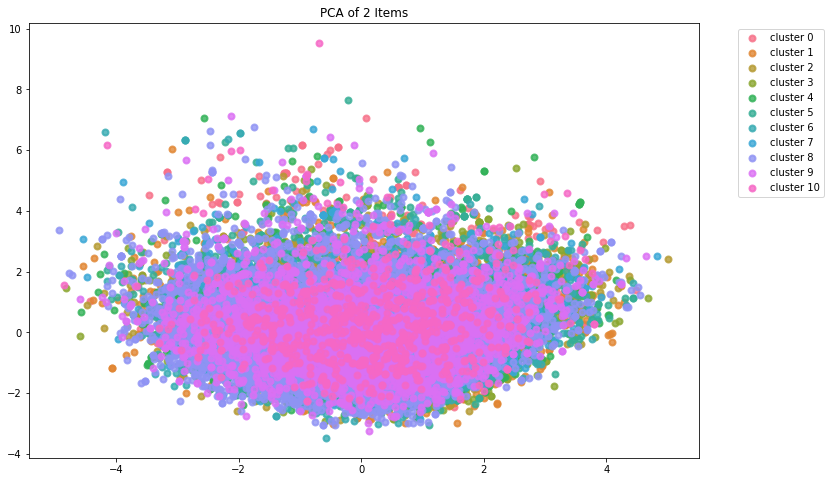

In [23]:
X_r = init_pca(X_train, kmeans.labels_,2)

##### Optimize PCA with the best number of components

In [24]:
def pca_optimizer(X_train):
    X=X_train
    n_components = X.shape[1]

    # Run PCA with all components
    pca = PCA(n_components=n_components, random_state=876)
    X_r = pca.fit(X).transform(X)

    # Calculating the 95% Variance
    total_variance = sum(pca.explained_variance_)
    print("Total Variance in our dataset is: ", total_variance)
    var_95 = total_variance * 0.95
    print("The 95% variance we want to have is: ", var_95)

    # Creating a df with the components and explained variance
    a = zip(range(n_components), pca.explained_variance_)
    a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

    for i in range(n_components):
        if sum(a["Explained Variance"][0:(i-1)]) < var_95 and sum(a["Explained Variance"][0:(i+1)]) > var_95: 
            var_95_2 = sum(a["Explained Variance"][0:(i-1)])
            comp_num = i

    print(f'{comp_num} n_components results in a variance of: {var_95_2}' )
    
    # Plotting the Data
    plt.figure(1, figsize=(14, 8))
    plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
    plt.xlabel('n_components')
    plt.ylabel('explained_ratio_')

    # Plotting line with 95% e.v.
    plt.axvline(comp_num,linestyle=':', label='n_components - 95% explained', c ="blue")
    plt.legend(prop=dict(size=12))

    # adding arrow
    plt.annotate(f'{comp_num} eigenvectors used to explain 95% variance', xy=(comp_num, pca.explained_variance_ratio_[comp_num]), 
                 # xytext=(25, pca.explained_variance_ratio_[10]),
                arrowprops=dict(facecolor='blue', shrink=0.05))

    plt.show()

Total Variance in our dataset is:  23.000601857909203
The 95% variance we want to have is:  21.850571765013743
20 n_components results in a variance of: 21.511188526855335


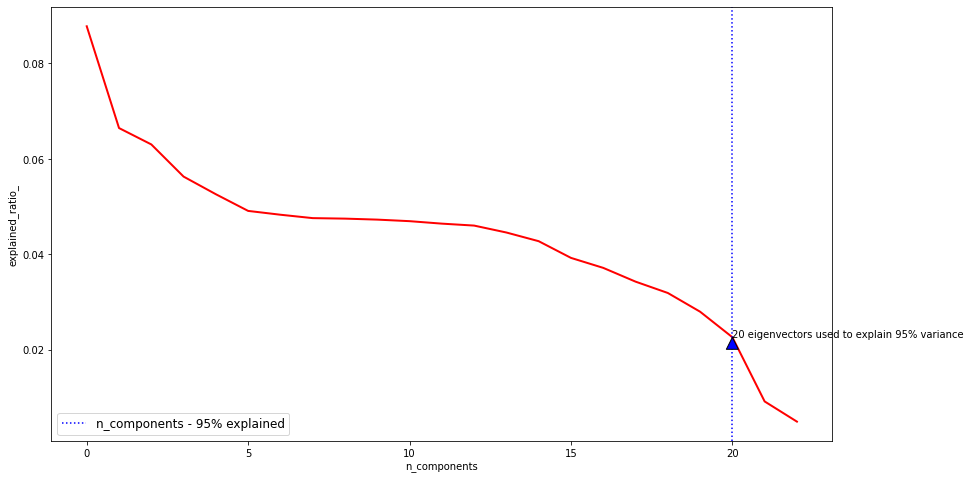

In [25]:
pca_optimizer(X_train)

##### Run PCA and Kmeans with optimized parameters

In [26]:
def run_pca(X_train, n_components):
    X = X_train
    pca = PCA(n_components=n_components, random_state=876)
    X_r = pca.fit(X).transform(X)
    print(f'Explained variance ratio(first {n_components} components):{pca.explained_variance_ratio_}')
    print(f'These {n_components} components represent {round(np.sum(pca.explained_variance_ratio_)*100, 2)}% of the variance')
    return(X_r)

Explained variance ratio(first 20 components):[0.08778075 0.06645866 0.06302896 0.05628711 0.05259259 0.0490997
 0.04829926 0.04758797 0.04748307 0.04727453 0.04695115 0.04643324
 0.04602572 0.04457375 0.04275455 0.03925813 0.03716515 0.03428308
 0.03190722 0.0279844 ]
These 20 components represent 96.32% of the variance
The innertia for 2 Clusters is: 795517.3845217705
The innertia for 3 Clusters is: 757562.6161232451
The innertia for 4 Clusters is: 718257.3435208243
The innertia for 5 Clusters is: 677225.424838356
The innertia for 6 Clusters is: 636268.1846981614
The innertia for 7 Clusters is: 595461.3111076871
The innertia for 8 Clusters is: 556270.6327732811
The innertia for 9 Clusters is: 515313.19444143237
The innertia for 10 Clusters is: 476429.9765632887
The innertia for 11 Clusters is: 439445.0985791988
The innertia for 12 Clusters is: 421273.93364800623
The innertia for 13 Clusters is: 399472.8130132805
The innertia for 14 Clusters is: 391185.5177413116
The innertia for 15 C

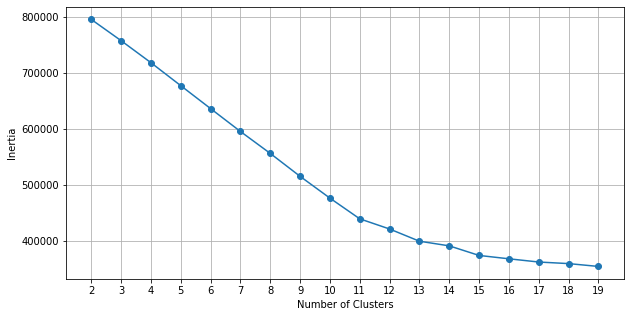

In [27]:
X_r = run_pca(X_train, 20)
k_optimizer(X_r, 20)

In [28]:
kmeans = KMeans(n_clusters=10, random_state=876)
kmeans.fit(X_r)

KMeans(n_clusters=10, random_state=876)

## Additional Data Optimization

In [29]:
df3 = df.drop(['artist_id',
         'artist_name', 
         'track_name', 
         'track_id', 
         'time_signature',
         'popularity'
        ],
        axis=1,
       )

In [30]:
df3['clusters'] = kmeans.labels_
df3.head(10)

,explicit,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,mode,release_year,duration,clusters
0,False,0.618,0.557,0.0,-5.227,0.0747,0.482000,0.2940,0.332,144.046,1.0,2021,2.703233,0
1,False,0.711,0.444,7.0,-7.602,0.2800,0.543000,0.1180,0.630,80.210,0.0,2021,3.622750,0
2,False,0.516,0.684,1.0,-5.736,0.0467,0.139000,0.1130,0.135,99.932,0.0,2021,3.716350,4
3,False,0.491,0.467,0.0,-9.551,0.0545,0.154000,0.1460,0.574,131.662,0.0,2021,3.245300,0
4,False,0.590,0.592,5.0,-7.909,0.2340,0.000575,0.4050,0.293,70.254,0.0,2021,3.257150,5
5,False,0.648,0.572,1.0,-7.416,0.3690,0.191000,0.0628,0.460,139.681,0.0,2021,2.511667,4
6,False,0.935,0.596,7.0,-5.642,0.1870,0.172000,0.1110,0.507,101.029,1.0,2022,2.732667,0
7,False,0.831,0.760,7.0,-6.073,0.2770,0.010800,0.0687,0.748,99.955,1.0,2022,2.171050,0
8,False,0.597,0.702,1.0,-4.602,0.1060,0.077100,0.5130,0.324,93.857,0.0,2021,2.537800,4
9,True,0.584,0.630,6.0,-7.131,0.2840,0.288000,0.1670,0.427,179.893,0.0,2022,3.238550,2


Inspect the different clusters

In [31]:
for i in range(10):
    display(df3[df3['clusters'] == i].describe())

,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,mode,release_year,duration,clusters
count,12375.000000,12375.000000,12375.000000,12375.000000,12375.000000,12375.000000,12375.000000,12375.000000,12375.000000,12375.000000,12375.000000,12375.000000,12375.0
mean,0.720080,0.600680,3.443313,-8.525273,0.150407,0.193206,0.190986,0.690667,117.274273,0.823596,2012.001616,3.864858,0.0
std,0.119609,0.169238,3.139116,3.753346,0.122975,0.215631,0.172122,0.192198,32.315772,0.381179,9.799353,2.349362,0.0
min,0.135000,0.007070,0.000000,-29.595000,0.024200,0.000005,0.016300,0.034800,36.694000,0.000000,1965.000000,0.255783,0.0
25%,0.651000,0.482000,0.000000,-10.821000,0.055000,0.028400,0.083050,0.566000,86.826000,1.000000,2009.000000,3.219317,0.0
50%,0.736000,0.608000,2.000000,-7.812000,0.103000,0.111000,0.124000,0.716000,117.774000,1.000000,2014.000000,3.659317,0.0
75%,0.807000,0.725000,7.000000,-5.723000,0.221000,0.286000,0.253000,0.844000,142.222500,1.000000,2019.000000,4.083333,0.0
max,0.990000,0.998000,7.000000,0.160000,0.959000,0.995000,0.999000,0.986000,211.958000,1.000000,2022.000000,64.339933,0.0


,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,mode,release_year,duration,clusters
count,3603.000000,3603.000000,3603.0,3603.00000,3603.000000,3603.000000,3603.000000,3603.000000,3603.000000,3603.000000,3603.000000,3603.000000,3603.0
mean,0.716476,0.600960,9.0,-8.52908,0.152546,0.199588,0.187305,0.689386,119.776608,0.490147,2011.444352,3.829710,1.0
std,0.122012,0.167415,0.0,3.73981,0.120784,0.223966,0.168613,0.194088,31.558043,0.499972,10.240902,1.485466,0.0
min,0.178000,0.027800,9.0,-29.39500,0.023800,0.000003,0.018500,0.043600,37.316000,0.000000,1965.000000,0.283850,1.0
25%,0.643000,0.481500,9.0,-10.62700,0.057700,0.030000,0.081200,0.557500,88.826500,0.000000,2008.000000,3.237417,1.0
50%,0.733000,0.616000,9.0,-7.68900,0.113000,0.112000,0.122000,0.719000,125.164000,0.000000,2014.000000,3.706867,1.0
75%,0.804000,0.725000,9.0,-5.82600,0.226000,0.305500,0.243000,0.848000,142.989500,1.000000,2019.000000,4.152667,1.0
max,0.978000,0.971000,9.0,-0.27700,0.957000,0.995000,0.999000,0.986000,213.529000,1.000000,2022.000000,45.782833,1.0


,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,mode,release_year,duration,clusters
count,3028.000000,3028.000000,3028.0,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.0
mean,0.722192,0.616717,6.0,-8.427269,0.173871,0.177691,0.187070,0.695817,116.651423,0.480185,2012.119881,3.755639,2.0
std,0.117649,0.167241,0.0,3.759114,0.129196,0.193808,0.163381,0.191567,32.439160,0.499690,9.295314,1.424443,0.0
min,0.182000,0.055400,6.0,-26.501000,0.024600,0.000014,0.016500,0.078500,48.278000,0.000000,1968.000000,0.308217,2.0
25%,0.657000,0.497000,6.0,-10.906000,0.067300,0.028175,0.083000,0.574000,87.887000,0.000000,2009.000000,3.198667,2.0
50%,0.737000,0.627000,6.0,-7.666500,0.134000,0.111000,0.122000,0.722000,108.960000,0.000000,2014.000000,3.636450,2.0
75%,0.805000,0.746000,6.0,-5.616500,0.256250,0.261000,0.251250,0.849250,142.050750,1.000000,2019.000000,4.041125,2.0
max,0.963000,0.991000,6.0,-1.079000,0.956000,0.981000,0.987000,0.982000,204.259000,1.000000,2022.000000,41.002883,2.0


,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,mode,release_year,duration,clusters
count,3003.000000,3003.000000,3003.0,3003.000000,3003.000000,3003.000000,3003.000000,3003.000000,3003.000000,3003.000000,3003.00000,3003.000000,3003.0
mean,0.727814,0.595476,10.0,-8.764752,0.166185,0.189106,0.179456,0.717480,114.983711,0.338328,2011.77023,3.712091,3.0
std,0.116642,0.169031,0.0,3.834409,0.132395,0.218487,0.153370,0.190078,32.541531,0.473220,9.85294,1.256486,0.0
min,0.216000,0.083600,10.0,-32.408000,0.023900,0.000009,0.017000,0.079000,58.659000,0.000000,1965.00000,0.296050,3.0
25%,0.660500,0.469500,10.0,-11.167000,0.064000,0.025400,0.080500,0.610000,85.852500,0.000000,2009.00000,3.124125,3.0
50%,0.742000,0.596000,10.0,-8.059000,0.121000,0.101000,0.120000,0.758000,105.115000,0.000000,2014.00000,3.623300,3.0
75%,0.809000,0.724500,10.0,-5.834000,0.247000,0.276000,0.243000,0.865500,140.019000,1.000000,2019.00000,4.068975,3.0
max,0.978000,0.984000,10.0,-1.580000,0.947000,0.973000,0.982000,0.985000,218.062000,1.000000,2022.00000,35.702000,3.0


,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,mode,release_year,duration,clusters
count,4188.000000,4188.000000,4188.0,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.0
mean,0.727000,0.622710,1.0,-8.298926,0.179209,0.172180,0.177256,0.684061,116.764216,0.702245,2012.225883,3.707792,4.0
std,0.117745,0.170864,0.0,3.850428,0.132960,0.195241,0.147882,0.200913,32.360664,0.457326,9.385697,2.259293,0.0
min,0.192000,0.026600,1.0,-25.257000,0.024800,0.000012,0.011700,0.036600,35.613000,0.000000,1965.000000,0.306567,4.0
25%,0.655000,0.498750,1.0,-10.526000,0.066100,0.025500,0.081600,0.551000,89.657250,0.000000,2009.000000,3.102712,4.0
50%,0.740000,0.634000,1.0,-7.502000,0.142000,0.102500,0.118000,0.715000,109.997000,1.000000,2014.000000,3.571167,4.0
75%,0.813000,0.754000,1.0,-5.521000,0.269000,0.242250,0.242000,0.849000,140.336000,1.000000,2019.000000,3.983333,4.0
max,0.983000,0.996000,1.0,-0.167000,0.939000,0.978000,0.998000,0.998000,210.007000,1.000000,2022.000000,60.010617,4.0


,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,mode,release_year,duration,clusters
count,2770.000000,2770.000000,2770.0,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.0
mean,0.709229,0.602250,5.0,-8.465723,0.139831,0.211165,0.195549,0.709905,116.103938,0.452347,2012.330325,3.732930,5.0
std,0.125991,0.172697,0.0,3.809819,0.116491,0.230111,0.174455,0.194853,32.944723,0.497814,9.598189,1.546126,0.0
min,0.148000,0.000177,5.0,-24.749000,0.025800,0.000022,0.014200,0.000010,41.066000,0.000000,1968.000000,0.382317,5.0
25%,0.641250,0.484000,5.0,-10.769250,0.051800,0.039100,0.088925,0.585250,86.170000,0.000000,2009.000000,3.145558,5.0
50%,0.727000,0.614000,5.0,-7.730000,0.094950,0.118500,0.129000,0.747000,109.109500,0.000000,2014.000000,3.623892,5.0
75%,0.800000,0.735000,5.0,-5.643750,0.200000,0.305000,0.250750,0.869000,142.039000,1.000000,2019.000000,4.067117,5.0
max,0.961000,0.967000,5.0,-0.711000,0.950000,0.994000,0.984000,0.997000,210.138000,1.000000,2022.000000,61.885450,5.0


,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,mode,release_year,duration,clusters
count,2629.000000,2629.000000,2629.0,2629.000000,2629.000000,2629.000000,2629.000000,2629.000000,2629.000000,2629.000000,2629.000000,2629.000000,2629.0
mean,0.714393,0.601622,8.0,-8.302948,0.159462,0.223348,0.177295,0.714668,116.340741,0.705591,2012.504755,3.653160,6.0
std,0.120857,0.168275,0.0,3.697551,0.126676,0.219721,0.148336,0.189514,32.248649,0.455863,9.528120,1.792844,0.0
min,0.117000,0.051700,8.0,-29.753000,0.025000,0.000017,0.020700,0.028500,36.575000,0.000000,1965.000000,0.288117,6.0
25%,0.643000,0.482000,8.0,-10.540000,0.057500,0.045100,0.084000,0.599000,86.751000,0.000000,2009.000000,3.080067,6.0
50%,0.726000,0.603000,8.0,-7.657000,0.112000,0.155000,0.122000,0.739000,111.343000,1.000000,2015.000000,3.546450,6.0
75%,0.802000,0.727000,8.0,-5.562000,0.238000,0.337000,0.233000,0.870000,141.721000,1.000000,2019.000000,3.990450,6.0
max,0.969000,0.982000,8.0,-0.240000,0.911000,0.993000,0.999000,0.989000,217.333000,1.000000,2022.000000,54.551333,6.0


,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,mode,release_year,duration,clusters
count,2455.000000,2455.000000,2455.0,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.0
mean,0.708839,0.603558,4.0,-8.432570,0.164076,0.219004,0.202739,0.668486,117.309986,0.240326,2012.207739,3.841988,7.0
std,0.122305,0.171991,0.0,3.675258,0.127641,0.240226,0.178155,0.191363,33.097459,0.427368,9.383699,1.233279,0.0
min,0.271000,0.003020,4.0,-25.318000,0.024600,0.000005,0.016100,0.037000,35.943000,0.000000,1965.000000,0.250600,7.0
25%,0.641000,0.482000,4.0,-10.407500,0.061550,0.037700,0.086950,0.548000,85.117500,0.000000,2009.000000,3.261217,7.0
50%,0.725000,0.615000,4.0,-7.660000,0.121000,0.125000,0.129000,0.686000,118.824000,0.000000,2014.000000,3.722833,7.0
75%,0.796000,0.730000,4.0,-5.792000,0.243000,0.313000,0.285000,0.821000,143.187500,0.000000,2019.000000,4.213117,7.0
max,0.962000,0.998000,4.0,-0.785000,0.945000,0.994000,0.992000,0.985000,213.926000,1.000000,2022.000000,26.994450,7.0


,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,mode,release_year,duration,clusters
count,3385.000000,3385.000000,3385.0,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.0
mean,0.729296,0.600384,11.0,-8.760428,0.163716,0.151615,0.186282,0.683088,119.378561,0.357755,2012.050222,3.833764,8.0
std,0.116174,0.172361,0.0,3.885732,0.124479,0.183718,0.162429,0.187001,32.006687,0.479410,9.510065,1.626413,0.0
min,0.159000,0.047900,11.0,-31.737000,0.024400,0.000010,0.019000,0.033800,58.736000,0.000000,1968.000000,0.281267,8.0
25%,0.662000,0.479000,11.0,-11.098000,0.061900,0.017000,0.084900,0.563000,89.973000,0.000000,2009.000000,3.240100,8.0
50%,0.746000,0.613000,11.0,-7.937000,0.119000,0.075800,0.120000,0.700000,123.765000,0.000000,2015.000000,3.667783,8.0
75%,0.812000,0.731000,11.0,-5.915000,0.246000,0.222000,0.247000,0.831000,142.148000,1.000000,2019.000000,4.127783,8.0
max,0.979000,0.976000,11.0,0.152000,0.917000,0.900000,0.993000,0.987000,244.835000,1.000000,2022.000000,50.347917,8.0


,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,mode,release_year,duration,clusters
count,780.000000,780.000000,780.0,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.0
mean,0.700495,0.598895,3.0,-8.278127,0.144366,0.287585,0.185707,0.733530,117.760322,0.479487,2012.744872,3.500411,9.0
std,0.131488,0.167516,0.0,3.673987,0.135458,0.263024,0.163347,0.201549,32.582122,0.499900,9.003368,1.007811,0.0
min,0.316000,0.043000,3.0,-38.541000,0.025300,0.000057,0.028600,0.037300,63.661000,0.000000,1969.000000,0.275550,9.0
25%,0.611000,0.494750,3.0,-10.154000,0.047575,0.063225,0.090925,0.618750,84.916000,0.000000,2010.000000,2.910825,9.0
50%,0.719500,0.602000,3.0,-7.690500,0.086400,0.214500,0.124000,0.767000,116.120500,0.000000,2015.000000,3.474600,9.0
75%,0.800000,0.718000,3.0,-5.815000,0.214000,0.467750,0.213250,0.898000,141.379000,1.000000,2019.000000,3.975908,9.0
max,0.976000,0.965000,3.0,-1.463000,0.961000,0.977000,0.977000,0.984000,216.207000,1.000000,2022.000000,7.870967,9.0


Observation of the clusters show that there is a distinct separation by the key of the track and that does not represent the genre of the track.
The key of a song can be assumed to be randomly generated for every genre and is not a genre specific feature. This means that it will be removed from the dataframe.

In [32]:
df3 = df.drop(['artist_id',
         'artist_name', 
         'track_name', 
         'track_id', 
         'key',
         'time_signature',
         'popularity',
        ],
        axis=1,
       )

In [33]:
df3['mode'] = df3['mode'].replace([1],'major')
df3['mode'] = df3['mode'].replace([0],'minor')

df3['explicit'] = df3['explicit'].replace([True],'explicit')
df3['explicit'] = df3['explicit'].replace([False],'clean')
df3.head(10)

,explicit,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,mode,release_year,duration
0,clean,0.618,0.557,-5.227,0.0747,0.482000,0.2940,0.332,144.046,major,2021,2.703233
1,clean,0.711,0.444,-7.602,0.2800,0.543000,0.1180,0.630,80.210,minor,2021,3.622750
2,clean,0.516,0.684,-5.736,0.0467,0.139000,0.1130,0.135,99.932,minor,2021,3.716350
3,clean,0.491,0.467,-9.551,0.0545,0.154000,0.1460,0.574,131.662,minor,2021,3.245300
4,clean,0.590,0.592,-7.909,0.2340,0.000575,0.4050,0.293,70.254,minor,2021,3.257150
5,clean,0.648,0.572,-7.416,0.3690,0.191000,0.0628,0.460,139.681,minor,2021,2.511667
6,clean,0.935,0.596,-5.642,0.1870,0.172000,0.1110,0.507,101.029,major,2022,2.732667
7,clean,0.831,0.760,-6.073,0.2770,0.010800,0.0687,0.748,99.955,major,2022,2.171050
8,clean,0.597,0.702,-4.602,0.1060,0.077100,0.5130,0.324,93.857,minor,2021,2.537800
9,explicit,0.584,0.630,-7.131,0.2840,0.288000,0.1670,0.427,179.893,minor,2022,3.238550


In [34]:
columns = ['mode', 'explicit']
df3 = one_hot_encode(columns, df3)
df3.head()

mode
explicit


,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,release_year,duration,minor,explicit
0,0.618,0.557,-5.227,0.0747,0.482000,0.294,0.332,144.046,2021,2.703233,0,0
1,0.711,0.444,-7.602,0.2800,0.543000,0.118,0.630,80.210,2021,3.622750,1,0
2,0.516,0.684,-5.736,0.0467,0.139000,0.113,0.135,99.932,2021,3.716350,1,0
3,0.491,0.467,-9.551,0.0545,0.154000,0.146,0.574,131.662,2021,3.245300,1,0
4,0.590,0.592,-7.909,0.2340,0.000575,0.405,0.293,70.254,2021,3.257150,1,0


In [35]:
scaler = StandardScaler()
X_train_2 = scaler.fit_transform(df3)
X_train_2 = pd.DataFrame(X_train_2, columns=[df3.columns])

In [36]:
X_train_2

,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,release_year,duration,minor,explicit
0,-0.847434,-0.278386,0.866977,-0.665478,1.339412,0.644171,-1.873501,0.827075,0.925418,-0.572233,-0.828910,-0.271856
1,-0.073181,-0.943692,0.238272,0.961875,1.622347,-0.420749,-0.331914,-1.145066,0.925418,-0.087121,1.206404,-0.271856
2,-1.696616,0.469347,0.732235,-0.887425,-0.251521,-0.451003,-2.892604,-0.535777,0.925418,-0.037740,1.206404,-0.271856
3,-1.904749,-0.808275,-0.277663,-0.825597,-0.181946,-0.251330,-0.621608,0.444485,0.925418,-0.286253,1.206404,-0.271856
4,-1.080543,-0.072318,0.157004,0.597246,-0.893575,1.315796,-2.075252,-1.452645,0.925418,-0.280002,1.206404,-0.271856
...,...,...,...,...,...,...,...,...,...,...,...,...
38211,0.251506,0.445796,0.774855,0.240545,0.727158,-0.233178,0.340591,0.410039,0.718482,-0.542750,-0.828910,-0.271856
38212,-1.513459,0.139638,0.213389,2.103320,1.817155,-0.575042,-1.397575,-1.562658,0.718482,-0.457873,1.206404,-0.271856
38213,-1.463507,-0.307824,1.050426,0.938095,-0.158755,-0.551444,-1.030284,-1.430618,0.408078,-0.597855,-0.828910,-0.271856
38214,-0.556049,-0.025217,-0.056888,0.303958,-0.808115,-0.818279,0.578554,-0.593178,0.718482,-0.814037,1.206404,-0.271856


The innertia for 2 Clusters is: 407616.0715755709
The innertia for 3 Clusters is: 368886.3313417241
The innertia for 4 Clusters is: 344486.332788777
The innertia for 5 Clusters is: 324201.7654874846
The innertia for 6 Clusters is: 301987.838368997
The innertia for 7 Clusters is: 282931.58719153854
The innertia for 8 Clusters is: 266870.80042395985
The innertia for 9 Clusters is: 256477.1305997773
The innertia for 10 Clusters is: 247258.95956244683
The innertia for 11 Clusters is: 240193.5362695969
The innertia for 12 Clusters is: 233975.12003117832
The innertia for 13 Clusters is: 228275.8401967991
The innertia for 14 Clusters is: 222916.0941445677
The innertia for 15 Clusters is: 218031.5634402095
The innertia for 16 Clusters is: 215558.08817180697
The innertia for 17 Clusters is: 211759.0764038295
The innertia for 18 Clusters is: 208361.3511339168
The innertia for 19 Clusters is: 204972.81169311082


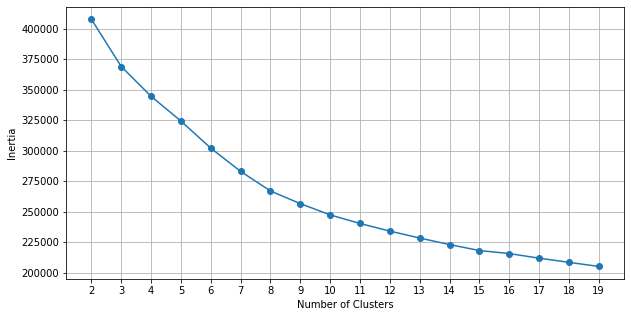

In [37]:
k_optimizer(X_train_2, 20)

In [38]:
kmeans2 = KMeans(n_clusters=6, random_state=876)
kmeans2.fit(X_train_2)

KMeans(n_clusters=6, random_state=876)

In [39]:
# Get the number of values within each cluster
cluster_count(kmeans2.labels_)

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5
0,6920,4146,9434,2624,15044,48


Explained variance ratio:[0.16775873 0.12679591]
These components accounts for 29.46% of the variance


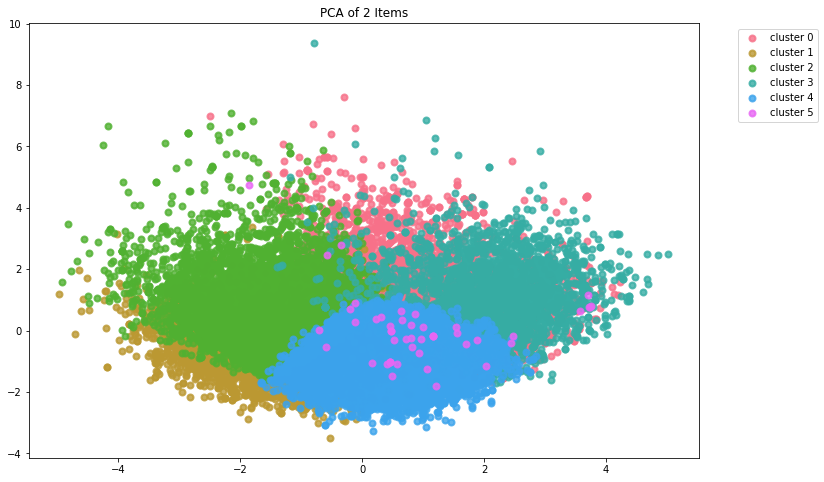

In [40]:
X_r2 = init_pca(X_train_2, kmeans2.labels_,2)

Optimize PCA

Total Variance in our dataset is:  12.00031401282219
The 95% variance we want to have is:  11.40029831218108
11 n_components results in a variance of: 11.263618373188137


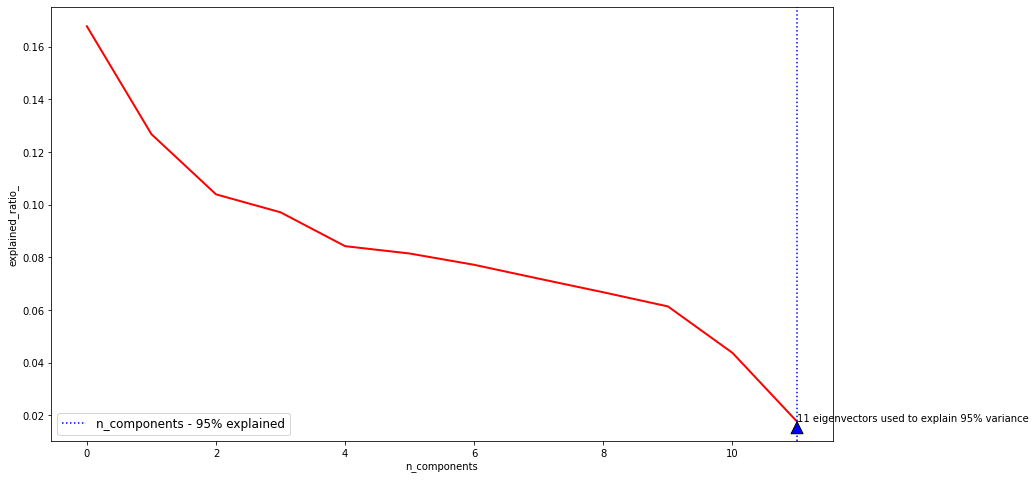

In [41]:
pca_optimizer(X_train_2)

Explained variance ratio(first 11 components):[0.16775873 0.12679591 0.10394519 0.09712338 0.08426569 0.08147488
 0.07718458 0.07192228 0.06675348 0.06138618 0.0437502 ]
These 11 components represent 98.24% of the variance
The innertia for 2 Clusters is: 399538.8985745278
The innertia for 3 Clusters is: 360808.4308325202
The innertia for 4 Clusters is: 336403.8442364996
The innertia for 5 Clusters is: 316132.79042946664
The innertia for 6 Clusters is: 294877.2633139146
The innertia for 7 Clusters is: 274859.6514247237
The innertia for 8 Clusters is: 264358.7892818401
The innertia for 9 Clusters is: 248423.53159059287
The innertia for 10 Clusters is: 239222.34082883276
The innertia for 11 Clusters is: 232164.6867681249
The innertia for 12 Clusters is: 226154.37774506825
The innertia for 13 Clusters is: 220458.09430461715
The innertia for 14 Clusters is: 215229.2784675983
The innertia for 15 Clusters is: 210028.0704524783
The innertia for 16 Clusters is: 206621.84783150145
The innertia f

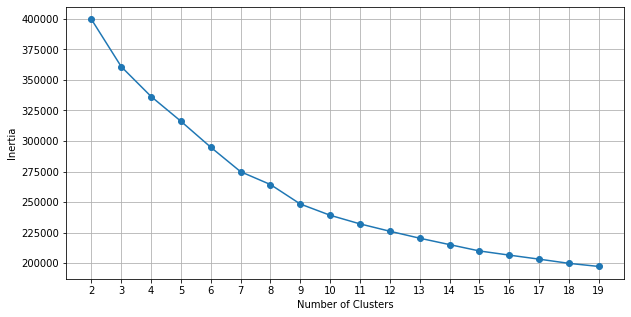

In [42]:
X_r2 = run_pca(X_train_2, 11)
k_optimizer(X_r2, 20)

In [43]:
kmeans2 = KMeans(n_clusters=6, random_state=876)
kmeans2.fit(X_r2)

KMeans(n_clusters=6, random_state=876)

In [44]:
df4 = df.copy()

In [45]:
df4['clusters'] = kmeans2.labels_

Analyze Clusters

In [46]:
cluster_count(kmeans2.labels_)

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5
0,7986,4136,9831,2619,13596,48


In [47]:
for i in range(6):
    df_describe = df4[df4['clusters'] == i].loc[:,['release_year','mode', 'duration']].describe()
    df_describe = pd.pivot_table(df_describe, columns = list(df_describe.index))
    
    display(
        df_describe
    )

,25%,50%,75%,count,max,mean,min,std
duration,3.264825,3.722775,4.281058,7986.0,23.972,3.964161,0.2506,1.479543
mode,0.000000,1.000000,1.000000,7986.0,1.000,0.514150,0.0000,0.499831
release_year,2011.000000,2015.000000,2019.000000,7986.0,2022.000,2014.213499,1969.0000,6.705944


,25%,50%,75%,count,max,mean,min,std
duration,2.723933,3.34655,3.913333,4136.0,17.999117,3.367186,0.252217,1.213910
mode,0.000000,1.00000,1.000000,4136.0,1.000000,0.700919,0.000000,0.457911
release_year,2011.000000,2015.00000,2019.000000,4136.0,2022.000000,2013.076886,1965.000000,9.236455


,25%,50%,75%,count,max,mean,min,std
duration,3.316883,3.690883,4.066667,9831.0,17.332983,3.816460,0.304,1.012620
mode,0.000000,1.000000,1.000000,9831.0,1.000000,0.629336,0.000,0.483007
release_year,1998.000000,2012.000000,2017.000000,9831.0,2022.000000,2007.540230,1965.000,12.558161


,25%,50%,75%,count,max,mean,min,std
duration,2.78345,3.2,3.63845,2619.0,10.62975,3.246490,0.27555,0.765809
mode,0.00000,1.0,1.00000,2619.0,1.00000,0.512791,0.00000,0.499932
release_year,2016.00000,2019.0,2021.00000,2619.0,2022.00000,2017.573501,1991.00000,5.053065


,25%,50%,75%,count,max,mean,min,std
duration,3.255521,3.68,4.09445,13596.0,21.535783,3.747847,0.471067,0.863331
mode,0.000000,1.00,1.00000,13596.0,1.000000,0.593851,0.000000,0.491131
release_year,2009.000000,2014.00,2019.00000,13596.0,2022.000000,2012.659753,1968.000000,8.184504


,25%,50%,75%,count,max,mean,min,std
duration,35.611733,45.112208,58.257017,48.0,64.339933,45.738806,25.72105,11.042217
mode,1.000000,1.000000,1.000000,48.0,1.000000,0.895833,0.00000,0.308709
release_year,2018.000000,2019.000000,2021.000000,48.0,2022.000000,2017.958333,1983.00000,6.115757


In [48]:
# df4.to_csv('tracks_classified_2.csv', index=False)

## Additional Data Optimization 2

- Release Year will be removed because the genre does change over the years and some of the years represent when the song was uploaded on spotify and not the actual release date for the track.

- The duration is drastically affecting the classification, so it will be removed in this stage.

- All other categorical values will be removed to determine how the classification works when limited to continuous features.

In [49]:
df5 = df.drop(['artist_id',
         'artist_name', 
         'track_name', 
         'track_id', 
         'key',
         'time_signature',
         'popularity',
         'release_year',
         'duration',
         'mode',
         'explicit',    
        ],
        axis=1,
       )

In [50]:
scaler = StandardScaler()
X_train_3 = scaler.fit_transform(df5)
X_train_3 = pd.DataFrame(X_train_3, columns=[df5.columns])

In [51]:
X_train_3

,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo
0,-0.847434,-0.278386,0.866977,-0.665478,1.339412,0.644171,-1.873501,0.827075
1,-0.073181,-0.943692,0.238272,0.961875,1.622347,-0.420749,-0.331914,-1.145066
2,-1.696616,0.469347,0.732235,-0.887425,-0.251521,-0.451003,-2.892604,-0.535777
3,-1.904749,-0.808275,-0.277663,-0.825597,-0.181946,-0.251330,-0.621608,0.444485
4,-1.080543,-0.072318,0.157004,0.597246,-0.893575,1.315796,-2.075252,-1.452645
...,...,...,...,...,...,...,...,...
38211,0.251506,0.445796,0.774855,0.240545,0.727158,-0.233178,0.340591,0.410039
38212,-1.513459,0.139638,0.213389,2.103320,1.817155,-0.575042,-1.397575,-1.562658
38213,-1.463507,-0.307824,1.050426,0.938095,-0.158755,-0.551444,-1.030284,-1.430618
38214,-0.556049,-0.025217,-0.056888,0.303958,-0.808115,-0.818279,0.578554,-0.593178


The innertia for 2 Clusters is: 258154.04000087525
The innertia for 3 Clusters is: 231742.74328399388
The innertia for 4 Clusters is: 212770.157351241
The innertia for 5 Clusters is: 196643.02139566277
The innertia for 6 Clusters is: 183946.28564357216
The innertia for 7 Clusters is: 173619.002731155
The innertia for 8 Clusters is: 166172.0165918254
The innertia for 9 Clusters is: 159475.08505352802
The innertia for 10 Clusters is: 153110.5790635278
The innertia for 11 Clusters is: 147769.25359371517
The innertia for 12 Clusters is: 143838.96008906217
The innertia for 13 Clusters is: 140355.64989005798
The innertia for 14 Clusters is: 137553.52235790435
The innertia for 15 Clusters is: 134829.67320295522
The innertia for 16 Clusters is: 132193.78558501796
The innertia for 17 Clusters is: 129959.21932814001
The innertia for 18 Clusters is: 127815.91687158174
The innertia for 19 Clusters is: 125491.62186313784


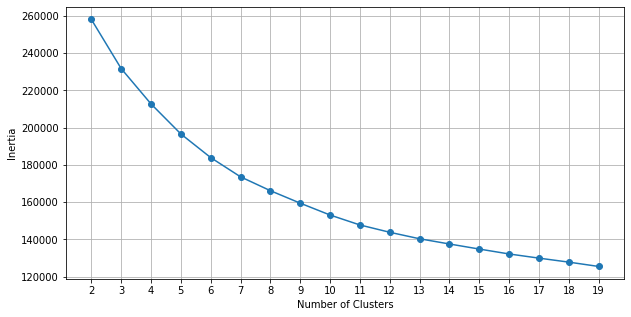

In [52]:
k_optimizer(X_train_3, 20)

In [53]:
kmeans3 = KMeans(n_clusters=6, random_state=876)
kmeans3.fit(X_train_3)

KMeans(n_clusters=6, random_state=876)

In [54]:
# Get the number of values within each cluster
cluster_count(kmeans3.labels_)

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5
0,3598,5904,11472,6646,2022,8574


Explained variance ratio:[0.23317063 0.18424872]
These components accounts for 41.74% of the variance


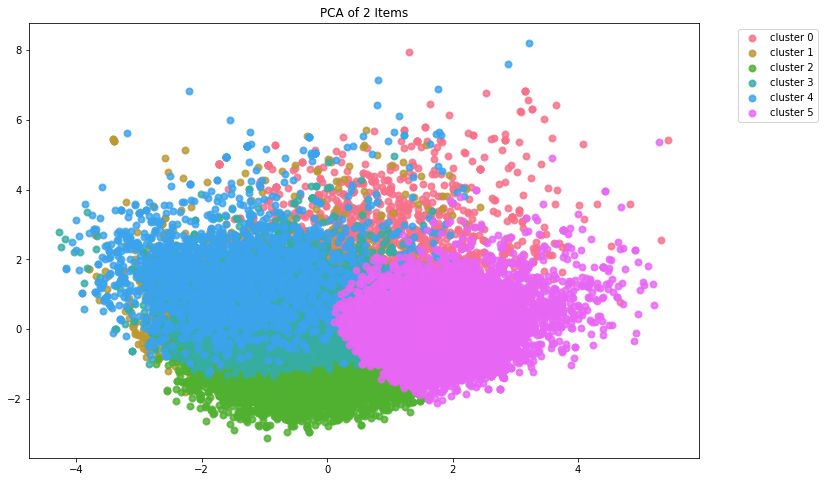

In [55]:
X_r3 = init_pca(X_train_3, kmeans3.labels_,2)

Optimize PCA

Total Variance in our dataset is:  8.000209341881467
The 95% variance we want to have is:  7.600198874787393
7 n_components results in a variance of: 7.243039396889429


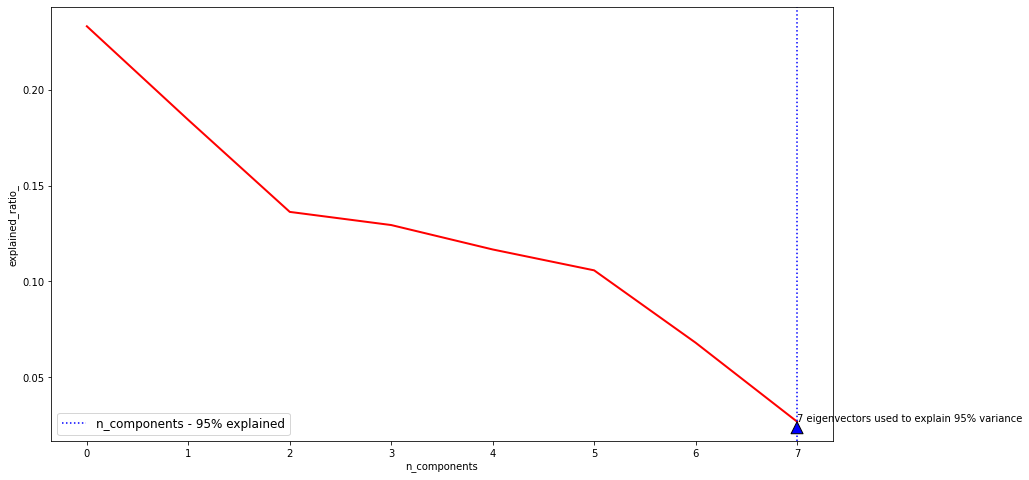

In [56]:
pca_optimizer(X_train_3)

Explained variance ratio(first 7 components):[0.23317063 0.18424872 0.13623759 0.12936802 0.11661746 0.10571382
 0.06793239]
These 7 components represent 97.33% of the variance
The innertia for 2 Clusters is: 249997.9397151473
The innertia for 3 Clusters is: 223581.07634425024
The innertia for 4 Clusters is: 204605.91277858696
The innertia for 5 Clusters is: 188483.307043022
The innertia for 6 Clusters is: 175796.39632422474
The innertia for 7 Clusters is: 165502.52168746633
The innertia for 8 Clusters is: 158061.44864093154
The innertia for 9 Clusters is: 151378.53039113618
The innertia for 10 Clusters is: 145015.84197150296
The innertia for 11 Clusters is: 139688.14088860105
The innertia for 12 Clusters is: 135736.05887656868
The innertia for 13 Clusters is: 132333.06646169483
The innertia for 14 Clusters is: 129488.27230382289
The innertia for 15 Clusters is: 126903.56493603428
The innertia for 16 Clusters is: 124206.74246214161
The innertia for 17 Clusters is: 122071.37978239472
Th

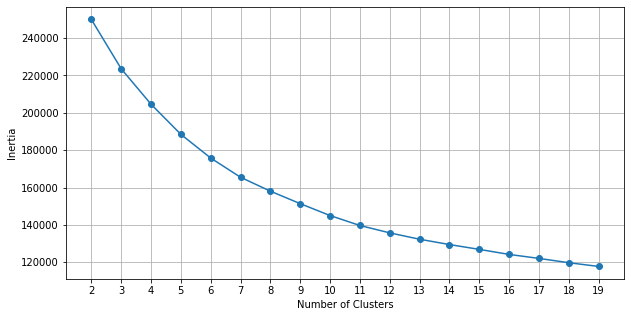

In [57]:
X_r3 = run_pca(X_train_3, 7)
k_optimizer(X_r3, 20)

In [58]:
kmeans3 = KMeans(n_clusters=4, random_state=876)
kmeans3.fit(X_r3)

KMeans(n_clusters=4, random_state=876)

In [59]:
df6 = df.copy()

In [60]:
df6['clusters'] = kmeans3.labels_

Analyze Clusters

In [61]:
cluster_count(kmeans3.labels_)

,cluster 0,cluster 1,cluster 2,cluster 3
0,9614,9852,14249,4501


In [62]:
for i in range(4):
    df_describe2 = df6[df6['clusters'] == i].describe()
    # df_describe2 = pd.pivot_table(df_describe2, columns = list(df_describe2.index))
    display(
        df_describe2
    )

,popularity,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,time_signature,mode,release_year,duration,clusters
count,9614.000000,9614.000000,9614.000000,9614.000000,9614.000000,9614.000000,9614.000000,9614.000000,9614.000000,9614.000000,9614.000000,9614.000000,9614.000000,9614.000000,9614.0
mean,11.247452,0.614289,0.716552,5.405450,-6.201669,0.204808,0.157330,0.296707,0.567195,116.497732,4.042334,0.553776,2014.297691,3.963289,0.0
std,12.515308,0.106318,0.119286,3.572372,2.285571,0.133525,0.149214,0.221790,0.189718,34.255832,0.426396,0.497126,7.070685,3.048186,0.0
min,0.000000,0.117000,0.215000,0.000000,-18.105000,0.023800,0.000003,0.017000,0.034800,35.625000,1.000000,0.000000,1968.000000,0.250600,0.0
25%,1.000000,0.549000,0.632000,2.000000,-7.591750,0.080300,0.031225,0.122000,0.433000,86.977250,4.000000,0.000000,2011.000000,3.150450,0.0
50%,7.000000,0.621000,0.718000,6.000000,-5.956000,0.197000,0.114000,0.242000,0.577000,105.787000,4.000000,1.000000,2016.000000,3.628225,0.0
75%,18.000000,0.688000,0.805000,8.000000,-4.610000,0.302000,0.246750,0.370000,0.708000,142.655000,4.000000,1.000000,2020.000000,4.140087,0.0
max,85.000000,0.918000,0.998000,11.000000,0.152000,0.950000,0.900000,0.999000,0.981000,244.835000,5.000000,1.000000,2022.000000,64.339933,0.0


,popularity,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,time_signature,mode,release_year,duration,clusters
count,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.00000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.0
mean,5.862261,0.775351,0.426052,5.714068,-12.745564,0.166548,0.103166,0.135583,0.68932,117.727017,3.999898,0.613581,2009.848051,3.814042,1.0
std,9.279714,0.083927,0.099862,3.655941,3.096035,0.125814,0.116196,0.103557,0.18120,33.024230,0.165861,0.486953,11.268493,1.227626,0.0
min,0.000000,0.290000,0.022600,0.000000,-38.541000,0.024300,0.000010,0.014900,0.02850,37.316000,1.000000,0.000000,1967.000000,0.275550,1.0
25%,0.000000,0.725000,0.362000,2.000000,-14.535250,0.069100,0.013600,0.072500,0.57000,84.527750,4.000000,0.000000,2006.000000,3.296217,1.0
50%,2.000000,0.782000,0.430000,6.000000,-12.464000,0.122000,0.056950,0.102000,0.70700,123.008000,4.000000,1.000000,2014.000000,3.681125,1.0
75%,8.000000,0.835000,0.493000,9.000000,-10.517750,0.237000,0.159000,0.156000,0.83400,143.041000,4.000000,1.000000,2019.000000,4.049613,1.0
max,83.000000,0.983000,0.882000,11.000000,-5.327000,0.959000,0.677000,0.987000,0.99800,210.007000,5.000000,1.000000,2022.000000,40.806200,1.0


,popularity,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,time_signature,mode,release_year,duration,clusters
count,14249.000000,14249.000000,14249.000000,14249.000000,14249.000000,14249.000000,14249.000000,14249.000000,14249.000000,14249.000000,14249.000000,14249.000000,14249.000000,14249.000000,14249.0
mean,9.595972,0.771252,0.687549,5.562496,-6.679060,0.119669,0.137783,0.139297,0.786915,118.846378,4.006667,0.583971,2011.879360,3.756718,2.0
std,12.227039,0.081513,0.110904,3.596962,2.082565,0.090395,0.135964,0.096212,0.136227,30.466186,0.155013,0.492916,9.472172,1.175172,0.0
min,0.000000,0.444000,0.302000,0.000000,-14.925000,0.023900,0.000005,0.011700,0.149000,57.518000,1.000000,0.000000,1965.000000,0.471067,2.0
25%,1.000000,0.716000,0.603000,2.000000,-8.008000,0.050300,0.028100,0.072700,0.698000,91.226000,4.000000,0.000000,2008.000000,3.240450,2.0
50%,4.000000,0.773000,0.682000,6.000000,-6.547000,0.084100,0.094400,0.105000,0.809000,120.175000,4.000000,1.000000,2014.000000,3.674950,2.0
75%,14.000000,0.830000,0.766000,9.000000,-5.224000,0.167000,0.209000,0.175000,0.897000,142.039000,4.000000,1.000000,2019.000000,4.100000,2.0
max,75.000000,0.990000,0.997000,11.000000,0.160000,0.583000,0.768000,0.770000,0.997000,213.926000,5.000000,1.000000,2022.000000,60.010617,2.0


,popularity,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,time_signature,mode,release_year,duration,clusters
count,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.0
mean,7.189736,0.660607,0.491002,5.371695,-9.898718,0.166207,0.642553,0.220790,0.682319,112.967070,3.957343,0.658076,2012.659853,3.454647,3.0
std,10.146022,0.139628,0.150179,3.507236,3.480102,0.164294,0.164050,0.185073,0.218967,32.198208,0.467573,0.474407,10.126492,1.676343,0.0
min,0.000000,0.148000,0.000177,0.000000,-32.408000,0.024600,0.203000,0.022900,0.000010,35.613000,1.000000,0.000000,1965.000000,0.252217,3.0
25%,0.000000,0.581000,0.397000,2.000000,-11.767000,0.047800,0.514000,0.105000,0.540000,84.275000,4.000000,0.000000,2010.000000,2.745550,3.0
50%,3.000000,0.678000,0.498000,6.000000,-9.534000,0.096700,0.638000,0.145000,0.726000,105.126000,4.000000,1.000000,2015.000000,3.361083,3.0
75%,10.000000,0.760000,0.591000,8.000000,-7.406000,0.243000,0.769000,0.286000,0.860000,136.899000,4.000000,1.000000,2020.000000,3.931783,3.0
max,69.000000,0.957000,0.961000,11.000000,-1.615000,0.961000,0.995000,0.993000,0.987000,216.207000,5.000000,1.000000,2022.000000,61.885450,3.0


In [63]:
df6.head()

,artist_id,artist_name,track_name,track_id,popularity,explicit,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,time_signature,mode,release_year,duration,clusters
0,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,L.I.F.E,0eyJ7wobiSnBiviFjDD4WV,13,False,0.618,0.557,0.0,-5.227,0.0747,0.482000,0.294,0.332,144.046,4.0,1.0,2021,2.703233,0
1,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,G-spot,0n5HmWeoStEZzxdu4DFiBv,10,False,0.711,0.444,7.0,-7.602,0.2800,0.543000,0.118,0.630,80.210,4.0,0.0,2021,3.622750,3
2,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,High grade,19BuQIrARlDVkOgY06BuP2,10,False,0.516,0.684,1.0,-5.736,0.0467,0.139000,0.113,0.135,99.932,4.0,0.0,2021,3.716350,0
3,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,Story,4Fvl6HcI4kfiACcelfWhkw,10,False,0.491,0.467,0.0,-9.551,0.0545,0.154000,0.146,0.574,131.662,5.0,0.0,2021,3.245300,0
4,2O6ph9RDudyvAR4Gj6VDoE,$wizzz,Bubble,4VJMkS6IEdG7pN8UpJugvT,12,False,0.590,0.592,5.0,-7.909,0.2340,0.000575,0.405,0.293,70.254,3.0,0.0,2021,3.257150,0


In [64]:
df6.to_csv('tracks_classified.csv', index=False)